## 💻 UnpackAI DL201 Bootcamp - Week 2 - Skills: Preprocessing Image Data

### 📕 Learning Objectives

* Have an appreciation for the diversity of image preprocessing tasks in various situations and that no one size fits all solution exists
* Gain an understanding of **spacial filtering**, the principles of how it works from a code based perspective, and how to apply to remove noise, sharpen edges, and detect edges
* Grasp the concept of thresholding, and appreciate how it can be a powerful tool
* Understand the difference between local and global thresholding, and the challenges involved. 

### 📖 Concepts map

* Spacial Filtering
* Thresholding
* Image Masking
* Global vs Local




In [ ]:
# import (use not verbose mode : ex "import -Uqq pandas as pd" if you are sure that there is no dependency error)
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from pathlib import Path
from PIL import Image
import IPython.display
import wand.image  # requires Imagemagick and !pip install Wand

In [4]:
# import data and images if necessary, and choose the right path
is_kaggle = False   # True if you are on Kaggle, False for local Windows, Linux or Mac environments.

if is_kaggle:
    !git clone https://github.com/unpackAI/DL201.git
    IMAGE_DIR = Path('/kaggle/working/DL201/img')
    DATA_DIR = Path('/kaggle/working/DL201/data')
else:
    # This section is for local execution, it is assumed that the notebook is on the 'Week-2' folder
    # of the DL201 repository.
    DATA_DIR = Path('../data')
    IMAGE_DIR = Path('../img')

    
# finally, check if we found the right pathes
if os.path.isdir(DATA_DIR):
    print(f'DATA_DIR is a directory, its path is {DATA_DIR}')
else:
    print("ERROR : DATA_DIR is not a directory")

if os.path.isdir(IMAGE_DIR):
    print(f'IMAGE_DIR is a directory, its path is {IMAGE_DIR}')
else:
    print("ERROR : IMAGE_DIR is not a directory")

DATA_DIR is a directory, its path is ..\data
IMAGE_DIR is a directory, its path is ..\img


# Part 1. Introduction

## 1.1 Why do we need pre-processing

There are several grades of image pre-processing. Some will only slightly improve the quality of the images (ex : noise reduction) so that the AI model will work better, while others will bring consistent modifications on the original images (ex : background suppression), enlighting shapes or features much more easy to compare than conventional images.

## 1.1 Do I need to know advanced mathemathics to preprocess images? 

While there's always some level of math involved in the pre-processing algorithms, python make them easy to call as pre-defined functions. So, most of the time, you just need to know the name of the algorithm and do not need to implement it by your self. In those cases, no math is required.

Likewise, you don't need to impliment a Fourier transform from scratch, as long as you can understand the inputs and outputs of it, and what they mean towards accomplishing the objective of cleaning and enhancing the data.

Before deep learning, one of the most common ways to extract features was SIFT and its evolutions like SURF. SIFT was very complex algorithms that few people understood completely, but it is heavily cited because everyone used it.

In [ ]:
XXXXXXXXXX SURF PICTURE XXXXXXXX

Now, most deep-learning methods and their pre-processing steps are mostly based on simple matrix operations, such as convolutional products.

In [ ]:
XXXXXXXXXXXXXXXX Convolutional Product Picture XXXXXXXXXXXXXXXXXXXX

## 1.2 What are the Challenges of Image Preprocessing?

Although Image Proprocessing requires knowledge of many algos, but it's application dependent. You don't have to learn every method under the sun to be effective.  

In some situations some approaches may be more advantageous than others. Some data may not need preprocessing if the model is trained by images uploaded by users that are taken in a variety of lighting conditions, while others, such in an industrial setting, may require preprocessing to increase performance in order to highlight defective product that can be removed from the line.  

## 1.3 How does this apply to medical images? 

When using a pretrained model that is trained on color images, it may make sense to preprocess x-rays and MRIs using a technique by extending the grayscale specture to all that covered by visible light that cameras pick up.

This is because x-rays and MRIs are often black and white or the same shade of color. By expanding the color spectrum to include more color, it can highlight features that would be more difficult to spot otherwise. 

In [16]:
braintumor = Image.open(IMAGE_DIR/'week2/braintumor.jpg')

In [6]:
grayscale = np.array(braintumor)
grayscale.shape

(899, 723)

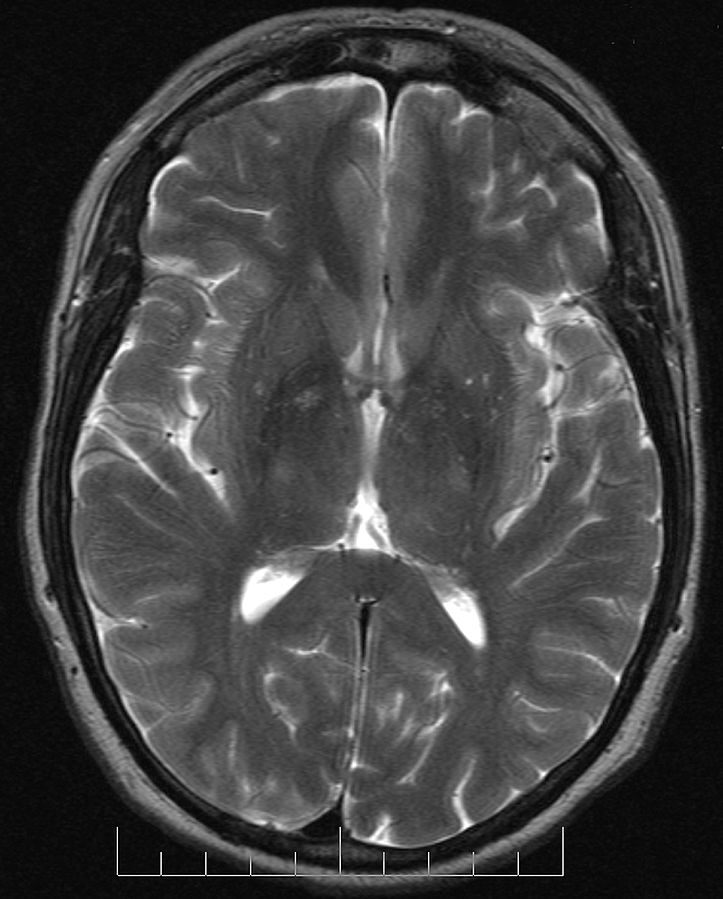

In [15]:
IPython.display.Image(IMAGE_DIR/'week2/braintumor.jpg',
                      width=250,height=250)

In [14]:
pseudoColoredImage = cv2.applyColorMap(grayscale, cv2.COLORMAP_JET)

In [9]:
pseudoColoredImage.shape

(899, 723, 3)

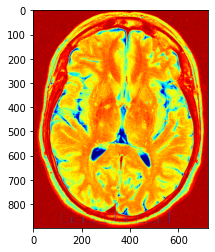

In [10]:
plt.imshow(pseudoColoredImage)
plt.show()

## 1.4 What are the two main methods of image pre-processing ?

* Thresholding
* Spacial filters
* Frequency filters

There are many ways to do this, but two main categories are Spacial Filters and Frequency Filters. Both treat the problem differently, and are used in different situations. 

In this notebook, we'll mainly go into the details of ***Thresholding*** and ***Spacial Filters*** because they are related to the concepts learned in the first week and build on top of them. 

# Part 2. Spacial Filters
XXXXXXXXXX IMAGE OF KERNEL --- CONVOLUTION XXXXXXXXXXXXXXXXXXXXX

## 2.1 Definition
A Spacial Filter uses the principle of using the information in neighboring pixels to be able to correct, restore, or enhance the image. 

In [11]:
example_img_path = str(IMAGE_DIR/'week2/chimpanzee.jpg')
example_img = cv2.imread(example_img_path)

## 2.2 How do they work?

This is done using a mask, which is a small 3x3 or larger matrix that is moved across all of the pixels. Here is an example where we will add some noise to an image.

In [12]:
# Read image using Image() function
with wand.image.Image(filename=example_img_path)as noisy_img:
  
    # Generate noise image using spread() function
    noisy_img.noise("gaussian", attenuate = 0.9)
    noisy_img.save(filename =IMAGE_DIR/'week2'/"noisyExample.jpg")

In [ ]:
noisy_img = cv2.imread(str(IMAGE_DIR/'week2'/"noisyExample.jpg"))
IPython.display.Image(IMAGE_DIR/'week2/noisyExample.jpg',
                      width=250,height=250)

This image now has some noise added to it. The goal of this exercise is to extract more features from the chimpanzees in the background of the image.

## 2.3 Example of space filter : Noise Removal (Blurring)

A mean filter takes the values of all the pixels surrounding it, and applying it to that pixel. It does this across the entire image.

In [271]:

means_filtered_img = cv2.fastNlMeansDenoisingColored(noisy_img,None,10,10,7,21)


XXXX second example XXXXXX
g_blurred = cv2.GaussianBlur(example_img, (5, 5), 0)
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

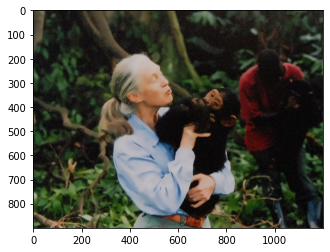

In [272]:
plt.imshow(cv2.cvtColor(means_filtered_img, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

## 2.4 Example of space filter : Image Enhancement

After image correction, Spacial Filters can be used to sharpen images. By taking the derivatives of the pixel values in a 2D space, this will highlight edges and features that had too much texture to stand out in the original image.

It is also possible to do it in a way where sharp differences in pixel values are increased by the mask with the zero and negative values not affecting flat areas, but picking up differences strongly.

***Sharpening an Image***

In [150]:
grayscale_example = cv2.cvtColor(example_img, cv2.COLOR_RGB2GRAY)

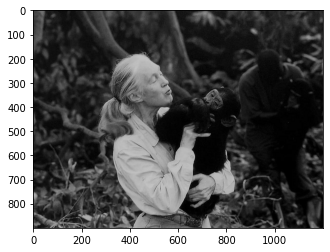

In [320]:
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

img_sharp = cv2.filter2D(grayscale_example,-1, kernel)

plt.imshow(cv2.cvtColor(img_sharp, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

# Part 3. Image segmentation and thresholding 

## 2.1 Definitions
Image segmentation is a group of techniques in digital image processing aiming at analysing and partition an image into multiple parts or regions.

In digital image processing, thresholding is the simplest method of segmenting images. On gray scale images, thresholding is the fact of choosing a pixel value V, and dividing the image in 2 parts, the pixels the gray value of which is lower than V, and the other ones.

Thresholding can be used to separate the foreground and background of an image.

### When is thresholding used?

This solves a variety of problems such as uneven lighting, hidden features, or even noise present in the background which may affect the model's performance.

Identifying a threshold is an important part of image preprocessing because it allows one to be much more precise.

### How can a threshold be identified?

There are many ways to identify a threshold, but the most simple one is by taking the mean, and looking for two normal distributions.

### Histogram based thresholding (Colors)

Uses the mean pixel values

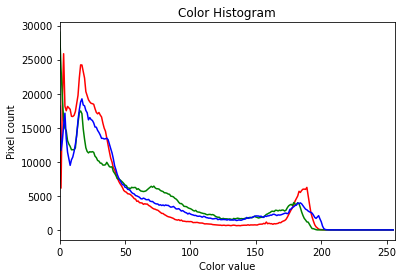

In [280]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        example_img[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

This graph shows two distinct places where many values are contained and identifies where to put a threshold. 

### Edge Based Segmentation


Another highly versatile method is to use edge detection to be able to apply adaptive thresholding. 

In [281]:
# Step 1 

g_blurred = cv2.GaussianBlur(example_img, (5, 5), 0)

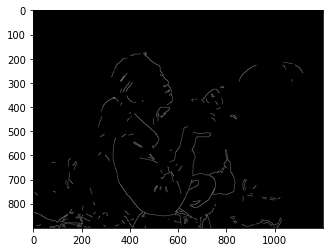

In [282]:
# Thresholds 
t_lower = 150
t_upper = 210

edge = cv2.Canny(g_blurred, t_lower,t_upper)

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

# V. Local Transforms (Masking)

Once we have identified a threshold, it becomes possible to preprocess an image in the areas where it needs it most.

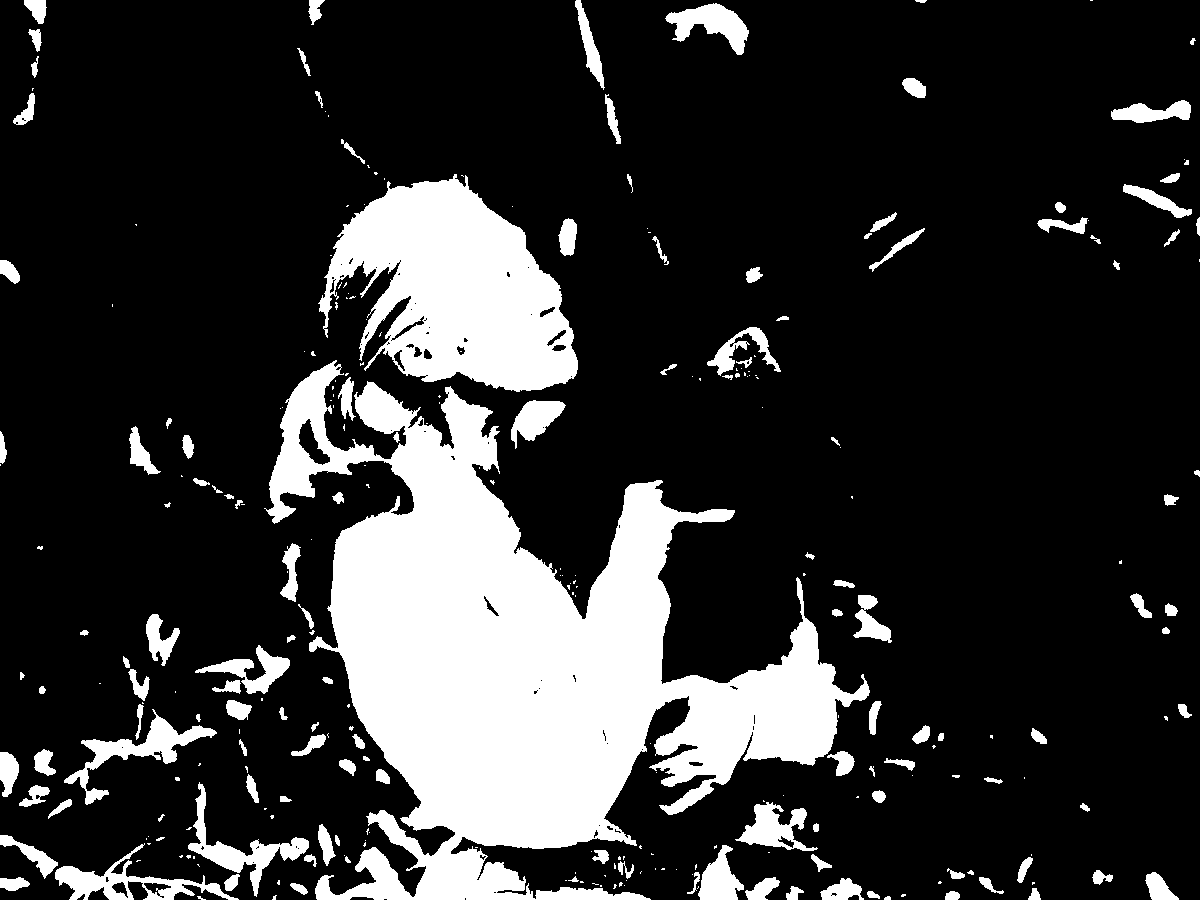

In [305]:
mask = example_img.copy()
value_threshold = 90
background = (grayscale_example <= value_threshold)
display(Image.fromarray(foreground).resize(640,:))

### Background Removal

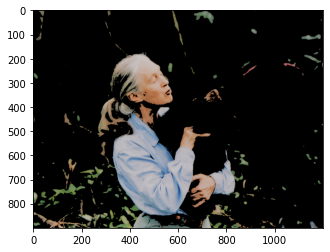

In [306]:
foreground = np.where(foreground[...,None],example_img,0)
background = np.where(background[...,None],example_img,0)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

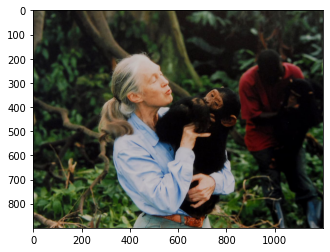

In [307]:
img_added = foreground + background
plt.imshow(cv2.cvtColor(img_added, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

### Brightness  

In [318]:
alpha = 1.5 # Kept Constant: Higher than 1.0 increases contrast, lower than 1.0 decreases
beta = 50 # A coefficient to increase the pixel values

background_adjusted = cv2.convertScaleAbs(background,alpha=alpha,beta=beta)

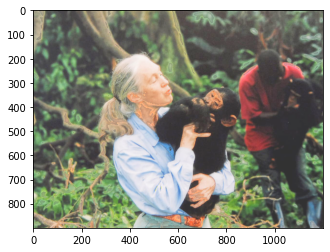

In [319]:
img_adjusted = foreground + background_adjusted
plt.imshow(cv2.cvtColor(img_adjusted, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

### 